In [1]:
#importing packages required

import numpy as np
import pandas as pd
import matplotlib.pyplot as mlp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn import preprocessing 


The following assignment consisted of 5 tasks of bulilding a single-layer neural network, shallow neural network and neural network with enhancements. Accordingly we have divided the sections below and mentioned the contribution done individually.


### Task 1: Logistic Regression Implementation

Logistic Regression is a classification technique used to predict two distinct set of classes on the basis of given observations. Unlike linear regression where continious outputs values are generated, the sigmoid function in logistic regression converts those output values into a probability score which can be utilized to sperated the two distinct classes.

For understanding, we can take X as our fearure vector, W can be considered as weights(normal to our plane) and B as the bias(interecept), a scalar. Then W.T + B is the equation of the plane. Since, sigmoid function accepts real-valued number, the W.T + B equation passed to the function will give us a probility value betwwen 0 and 1. Given the probability greater than 0.5, we can classify it as 1 and if the probability is less than 0.5, we can classify it as 0.

### Sigmoid Function

The sigmoid function takes any real valued number and outputs between the range of 0 and 1. The advantage of using the function is that outliers at some instance can impact the decision plane/surface when we consider linear model, but using sigmoid function if a point is very far in the direction normal to the plane, the probability score will reach 1 and otherwise if opposite to the direction of plane, it will be close to 0. 


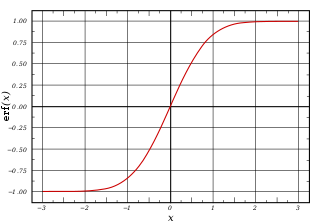
<center>
Image Source: Wikipedia
</center>

### Cost Function

Once the model is built we use the cost function to find out the errors. Based on the cost, we can decide how good the model in predicting the distinct classes and accordingly we can adjust the weights and perform the hyperparameter tuning. For logistic regression we will be using log loss which is ideal in our case of binary classification and the output of the model is a probability. The loss increases as the predicted probability deviates from the actual label.


### Gradient Descent 
Gradient Descent algorithm is used for optimization and reduce the cost function. The algorithm facilitates the model to find the gradients so as to decrease the errors. We can gradually find the global and local minima of the function. Since, the whole process is integral, the sigmoid function produces output whose derivates is easy to calculate and we can use gradient descent easily.

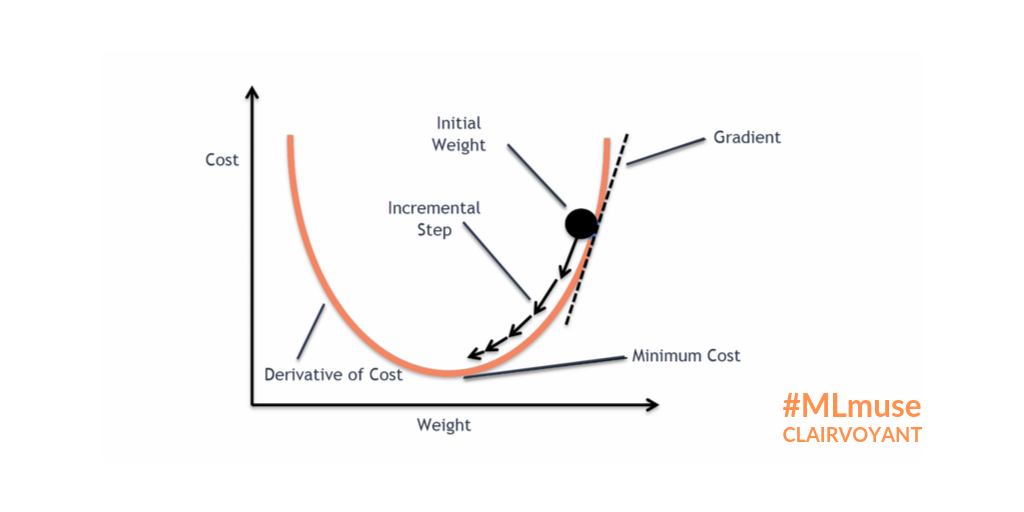

<center>
Image Source: CLAIRVOYANT
</center>

In [2]:
blobs_df = pd.read_csv('blobs300.csv')

blobs_features_cols = ['X1', 'X2', 'X3', 'X4']
A_blobs_b = blobs_df[blobs_features_cols]
B_blobs_b = blobs_df['Class'] 

In [3]:
#Creating Logistic Regression Classifier
class LogisticRegressionClassifier:
    
    # Creating init method and initializing the values 0.001 and 1000 to learning rate 
    # and number of iterations for gradient descent respectively
    def __init__(self, learning_rate=0.001, number_of_iterations=1000):

        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
        #Creating weights and bias as None initially, which laters need to be calculated
        self.weights = None
        self.bias = None
        
    #Creating the sigmoid function
    def sigmoid(self, x):

        return 1 / (1 + np.exp(-x))
    
    #Creating method to calculate gradient descent and updating weights and bias
    def gradient_descent(self, n_sample, p_score, actual, Z):

        
        #Calculating the derivative of wegights and bias
        dw = (1 / n_sample) * np.dot(Z.T, (p_score - actual))
        db = (1 / n_sample) * np.sum(p_score - actual)
        
        #Adjusting the weights and bias with respect to learing rate 
        self.weights = self.weights - self.learning_rate * dw
        self.bias = self.bias - self.learning_rate * db
    
    #Creating the fit method which will take training dataset and labels as parameters
    def fit(self, train_data, target_labels):
        
        #Initializing the parameters
        number_of_samples = train_data.shape[0]
        number_of_features = train_data.shape[1]
        self.weights = np.zeros(number_of_features)
        self.bias = 0

        # Running iterations for building linear model to fit into sigmoid functtion 
        # and updating weights and bias using gradient descent function
        for _ in range(self.number_of_iterations):
            
            #Creating a linear model with y and dot product of weights and training features data adding bias
            linear_model = np.dot(train_data, self.weights) + self.bias
            
            #Applying the build sigmoid function to the linear model to find the probilistic scores(approximations) of y
            probability_scores = self.sigmoid(linear_model)

            #Calling Gradient Descent function 
            self.gradient_descent(number_of_samples, probability_scores, target_labels, train_data)

    def predict_class(self, X):
        
        #Creating a linear model with y and dot product of weights and x adding bias
        linear_model = np.dot(X, self.weights) + self.bias
        
        #Applying the build sigmoid function to the linear model to find the approximation of y
        probability_scores = self.sigmoid(linear_model) 
        
        #Using list comprehension to predict classes(values > 0.5 as 1 and values < 0.5 as 0)
        predicted_classes = [1 if i > 0.5 else 0 for i in probability_scores]
        return np.array(predicted_classes)



#Defining the accuracy function to calculate the accuracy of the build model
def accuracy_score(actual_class, predicted_class):

    accuracy_score = np.sum(actual_class== predicted_class) / len(actual_class)
    return accuracy_score


#Building list to store accuracy for 10 iterations and calulating mean accuracy score
build_model_accuracy_list = []
scikitlearn_model_accuracy_list = []

### Task 2: Easy Tasks (Logistic Regressor Training and Performance)


### Performance on Blobs Dataset



In [4]:
for i in range(10):
    
    print("Iteration Number:",i+1)
    
    #Splitting the dataset into train and test datasets
    A_train_b, A_test_b, B_train_b, B_test_b = train_test_split(A_blobs_b, B_blobs_b, test_size=0.33, shuffle = True)
    
    #Converting the train and test datasets into numpy nd-array
    A_train_b, A_test_b, B_train_b, B_test_b = A_train_b.values , A_test_b.values , B_train_b.values , B_test_b.values
    
    #Converting the nd-array of test and train dataset into float values in order to facilitate matrix multiplications
    A_train_b, A_test_b = A_train_b.astype(float) , A_test_b.astype(float)    
    B_train_b, B_test_b = B_train_b.astype(float) , B_test_b.astype(float)
    
    #Creating a classifier object using the implemented(built) Logistic Regression classifier 
    #and setting parameters 0.0001 and 10000 for learning rate and number of iterations
    logistic_regression_build_model = LogisticRegressionClassifier(learning_rate=0.0001, number_of_iterations=10000)
    
    #Calling the fit function to train the model with the train datasets
    logistic_regression_build_model.fit(A_train_b, B_train_b)
    
    #Predicting the class on test dataset using the model
    build_predictions = logistic_regression_build_model.predict_class(A_test_b)
    
    #Calculating the accuracy score with accuracy function
    build_model_accuracy = (accuracy_score(B_test_b, build_predictions))*100
    
    #Printing the accuracy in each iteration
    print("Implemented Logistic Regression Classifier model accuracy:", build_model_accuracy)
    
    #Appending the accuracy of each iteration in the respective list
    build_model_accuracy_list.append(build_model_accuracy)

Iteration Number: 1
Implemented Logistic Regression Classifier model accuracy: 91.91919191919192
Iteration Number: 2
Implemented Logistic Regression Classifier model accuracy: 89.8989898989899
Iteration Number: 3
Implemented Logistic Regression Classifier model accuracy: 81.81818181818183
Iteration Number: 4
Implemented Logistic Regression Classifier model accuracy: 92.92929292929293
Iteration Number: 5
Implemented Logistic Regression Classifier model accuracy: 92.92929292929293
Iteration Number: 6
Implemented Logistic Regression Classifier model accuracy: 91.91919191919192
Iteration Number: 7
Implemented Logistic Regression Classifier model accuracy: 87.87878787878788
Iteration Number: 8
Implemented Logistic Regression Classifier model accuracy: 85.85858585858585
Iteration Number: 9
Implemented Logistic Regression Classifier model accuracy: 90.9090909090909
Iteration Number: 10
Implemented Logistic Regression Classifier model accuracy: 96.96969696969697


### Performance on Circles Dataset



In [5]:
circles_df = pd.read_csv('circles600.csv')
circles_df

circles_features_cols = ['X1', 'X2']
X_circles_c = circles_df[circles_features_cols]
y_circles_c = circles_df['Class'] 

In [6]:
for i in range(10):
    
    print("Iteration Number:",i+1)
    
    #Splitting the dataset into train and test datasets
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circles_c, y_circles_c, test_size=0.33, shuffle = True)
    
    #Converting the train and test datasets into numpy nd-array
    #X_train_c, X_test_c, y_train_c, y_test_c = X_train_c.values , X_test_c.values , y_train_c.values , y_test_c.values
    
    #Converting the nd-array of test and train dataset into float values in order to facilitate matrix multiplications
    X_train_c, X_test_c, y_train_c, y_test_c = X_train_c.astype(float),X_test_c.astype(float),y_train_c.astype(float),y_test_c.astype(float)    
    
    #Creating a classifier object using the implemented(built) Logistic Regression 
    #classifier and setting parameters 0.0001 and 10000 for learning rate and number of iterations
    logistic_regression_build_model = LogisticRegressionClassifier(learning_rate=0.0001, number_of_iterations=10000)
    
    #Calling the fit function to train the model with the train datasets
    logistic_regression_build_model.fit(X_train_c, y_train_c)
    
    #Predicting the class on test dataset using the model
    build_predictions = logistic_regression_build_model.predict_class(X_test_c)
    
    #Calculating the accuracy score with accuracy function
    build_model_accuracy = (accuracy_score(y_test_c, build_predictions))*100
    
    #Printing the accuracy in each iteration
    print("Implemented Logistic Regression Classifier model accuracy:", build_model_accuracy)
    
    #Appending the accuracy of each iteration in the respective list
    build_model_accuracy_list.append(build_model_accuracy)
    

Iteration Number: 1
Implemented Logistic Regression Classifier model accuracy: 66.16161616161617
Iteration Number: 2
Implemented Logistic Regression Classifier model accuracy: 31.313131313131315
Iteration Number: 3
Implemented Logistic Regression Classifier model accuracy: 46.96969696969697
Iteration Number: 4
Implemented Logistic Regression Classifier model accuracy: 63.63636363636363
Iteration Number: 5
Implemented Logistic Regression Classifier model accuracy: 49.494949494949495
Iteration Number: 6
Implemented Logistic Regression Classifier model accuracy: 47.97979797979798
Iteration Number: 7
Implemented Logistic Regression Classifier model accuracy: 47.97979797979798
Iteration Number: 8
Implemented Logistic Regression Classifier model accuracy: 60.60606060606061
Iteration Number: 9
Implemented Logistic Regression Classifier model accuracy: 46.464646464646464
Iteration Number: 10
Implemented Logistic Regression Classifier model accuracy: 46.96969696969697


### Task 3: Shallow Neural Network (Implementation and Testing)

### Neural Node
In a shallow neural network, a neuron/node provides a certain output to next layer upon feeding an input from previous layer. The node has performs 2 tasks in between: first it calculates the sum of weights and in second part it feeds the sum into activation function to get an ouptut.

### Network Layers

There are 3 layers in the neural network: the input layer, hidden layer and the output layer. In the hidden layer, we decide the number of nodes which will be performing the calculations. In our network we are keeping 3 hidden nodes and we can represent the equations done in the layer as following:

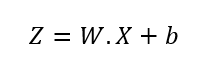

First we compute the outputs of hidden layer in a single matrix multiplication Z adding the bias.

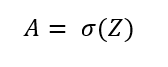

The result of the first equatio we feed the output to activation funtion.
There are various activation functions which we can use but for convinience we are using sigmoid.

### Weight Initialization
The weights in neural network is intialized randomly so as to avoid getting same derivative values for neurons after activations and there having more number of neurons in hidden layer won't contribute any improvement to the model. We also don't keep the value zero, so as to avoid summation to zero. In order to keep every neuron in the layer to be unique, we keep the different random weights for each neuron. To initialize the weights we are using normal distritbution since there are more values underlying at the mean, most of the random values will have more chances to lie closer to the mean and also we will be reducing the any possible symmetric situation. 

### Gradient Descent

In order to upates the random weights which we have initialized we will be updating them so as that the model learns. This is done through the process of forward propagation and bakward progapagtion. In the forward propagation step we calculate the outputs from input layer/X and during the backpropagation step we calculate the derivatives of the inputs at each step and update the weight matrix. 

We have used the equations used in the lecture notes to develop the algorithm.
#### Forward Propagation:
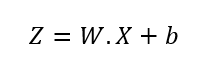
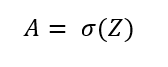

#### Backward Propagation:

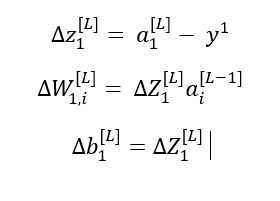
<center>
Output Layers
</center>

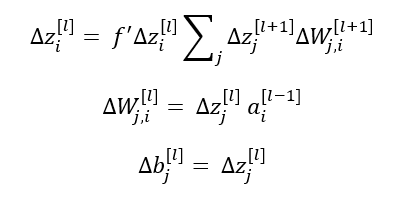
<center>
Hidden Layers
</center>


In [7]:
# Reading the blobs and circles dataset provided

blobs_dataset = pd.read_csv("blobs300.csv")
circles_dataset = pd.read_csv("circles600.csv")

X_data_circles,Y_data_circles = circles_dataset.iloc[:,:-1].values, circles_dataset.iloc[:,-1].values
X_data_blobs,Y_data_blobs = blobs_dataset.iloc[:,:-1].values, blobs_dataset.iloc[:,-1].values

# Z - normalization on circles dataset
mean = np.mean(X_data_circles, axis=0) 
sd = np.std(X_data_circles, axis=0) 
X_data_circles= (X_data_circles -  mean) / sd

# Z - normalization on blobs dataset
mean = np.mean(X_data_blobs, axis=0) 
sd = np.std(X_data_blobs, axis=0) 
X_data_blobs= (X_data_blobs -  mean) / sd

# splitting the circles dataset into training and test set
X_train_circles, X_test_circles, Y_train_circles, Y_test_circles = train_test_split(X_data_circles, 
                                                Y_data_circles, train_size = 2/3,random_state=44)

# splitting the circles training set into training and validation set
X_train_circles, X_val_circles, Y_train_circles, Y_val_circles = train_test_split(X_train_circles, Y_train_circles, 
                                                        train_size = 2/3,
                                                        random_state=44)

# splitting the circles dataset into training and test set
X_train_blobs, X_test_blobs, Y_train_blobs, Y_test_blobs = train_test_split(X_data_blobs, Y_data_blobs, 
                                                        train_size = 2/3,
                                                        random_state=44)

# splitting the circles training set into training and validation set
X_train_blobs, X_val_blobs, Y_train_blobs, Y_val_blobs = train_test_split(X_train_blobs, Y_train_blobs, 
                                                        train_size = 2/3,
                                                        random_state=44)

# reshaping to avoid broadcasting errors
Y_train_circles = Y_train_circles.reshape(Y_train_circles.shape[0],1)
Y_train_blobs = Y_train_blobs.reshape(Y_train_blobs.shape[0],1)

print("X_train circles shape:",X_train_circles.shape,"X_val circles shape:",
      X_val_circles.shape,"X_test circles shape:",X_test_circles.shape)
print("X_train blobs shape:",X_train_blobs.shape,"X_val blobs shape:",
      X_val_blobs.shape,"X_test blobs shape:",X_test_blobs.shape)

X_train circles shape: (266, 2) X_val circles shape: (134, 2) X_test circles shape: (200, 2)
X_train blobs shape: (133, 4) X_val blobs shape: (67, 4) X_test blobs shape: (100, 4)


In [8]:
def logistic_fn(z):
    """Author: Apoorva Patil"""
    return 1/(1+np.exp(-z))

def tanh(z):
    """Author: Apoorva Patil"""
    return np.tanh(z)

In [9]:
#cost function implementation
def costFunc(Yhat, Y):
    """Author: Swapnil Siddharth"""
    N = Y.shape[0]
    return -(1/N) * np.sum(Y*np.log(Yhat) + (1-Y)*np.log(1-Yhat))

In [10]:
# Initialize weights and biases
def initialize_params(input_size, h, output_size):
    """Author: Swapnil Siddharth"""
    np.random.seed(10)

    # initializing weights and biases from input layer to hidden layer
    # using normal distribution for weights
    Wih = np.random.normal(scale=0.5, size=(input_size, h))
    bih = np.zeros(shape=(1,h))

    # initializing weights and biases from hidden layer to output layer
    Who = np.random.normal(scale=0.5, size=(h, output_size))
    bho = np.zeros(shape=(output_size, 1))
    
    # creating a dictionary to store all the weights and biases
    params = {"Wih":Wih,"Bih":bih,"Who":Who,"Bho":bho}
    
    return params

In [6]:
def forward_propagation(X_train, parameters):
    """Authors: 
        Swapnil Siddharth
        Apoorva Patil
    """
    
    # fetching the weights and biases from the dictionary
    Wih = parameters["Wih"]
    Bih = parameters["Bih"]
    Who = parameters["Who"]
    Bho = parameters["Bho"]
    
    # calculating Z and f(Z) for the first layer
    Z1 = np.dot(X_train,Wih) + Bih
    A1 = logistic_fn(Z1)
    
    # calculating Z and f(Z) for the second layer
    Z2 = np.dot(A1, Who) + Bho
    A2 = logistic_fn(Z2)  # final output
    
    # creating a dictionary to store these values
    forward_feed = {"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}
    
    return forward_feed

In [7]:
def backward_propagation(X_train,Y_train, params, forward_feed, alpha):
    """Authors: 
        Swapnil Siddharth
        Apoorva Patil
    """

    # fetching the activation values from the dictionary
    A2 = forward_feed["A2"]
    A1 = forward_feed["A1"]
    
    # fetching the weights and biases from the dictionary
    Wih = params['Wih']
    Bih = params['Bih']
    Who = params['Who']
    Bho = params['Bho']
    
    N = X_train.shape[0]   #no of training cases
    
    # calculating the derivatives
    dZ2 = A2 - Y_train    # calculating the loss
    dW2 = (1./N)*np.dot(A1.T, dZ2)   # derivative of loss w.r.t y-hat
    db2 = (1./N)*np.sum(dZ2, axis=0, keepdims=True)
  
    dZ1 = np.dot(dZ2, Who.T)
    dZ1 = dZ1 * (A1 * (1-A1))   # derivative of hidden layer output to weights
    dW1 = (1./N)*np.dot(X_train.T, dZ1)  # X-train can be represented as a[0]
    db1 = (1./N)*np.sum(dZ1, axis=0, keepdims=True)


    # weight updates  
    Wih = Wih - alpha * dW1
    Bih = Bih - alpha * db1
    Who = Who - alpha * dW2
    Bho = Bho - alpha * db2
        
    # updating the new weight values in the dictionary
    params = {"Wih":Wih,"Bih":Bih,"Who":Who,"Bho":Bho}
    
    return params

In [8]:
def predict(X,params):
    """Author: Apoorva Patil"""
    
    # initializing an array with all zero values
    N = X.shape[0]
    Y_prediction = np.zeros((N,1))

    # fetching the y-hat values (output of final layer)
    forward_feed = forward_propagation(X, params)
    A2 = forward_feed['A2']
    
    # as we are using sigmoid/logistic function
    # if A2 value is greater than 0.5, predicted class is 1
    Y_prediction[A2 > 0.5] = 1
      
    return Y_prediction

In [9]:
def nn_train(X_train, Y_train, X_test, Y_test, input_size, h, output_size, epochs, alpha):
    """Authors: 
        Swapnil Siddharth
        Apoorva Patil
    """
    # initializing the weights and biases to random values
    params = initialize_params(input_size, h, output_size)
    
    # initializing an empty list to store the cost values
    costs_list = []
    
    for i in range(epochs+1):

        forward_feed = forward_propagation(X_train, params)
        params = backward_propagation(X_train, Y_train, params, forward_feed, alpha)
        
        cost_val = costFunc(forward_feed["A2"],Y_train)
        costs_list.append(cost_val)

        # calling the predict function on the training dataset
        train_pred = predict(X_train,params)

        #calling the predict function on the testing dataset after model training
        test_pred = predict(X_test,params)

        # calculating the accuracy using sklearn's accuracy_score function
        if i%(epochs/10)==0:
            acc_train=accuracy_score(Y_train, train_pred)
            acc_test=accuracy_score(Y_test, test_pred)
            print("epoch:",i,"train_accuracy:",acc_train,"test_accuracy:",acc_test)
    
    # plot the cost list
    mlp.plot(costs_list, color='red')
    mlp.ylabel('Cost')
    mlp.xlabel('Epochs')
    mlp.title("Variation in costs")
    mlp.show()
    
    return params


### Performance on Blobs Dataset



epoch: 0 train_accuracy: 0.5714285714285714 test_accuracy: 0.58
epoch: 1000 train_accuracy: 1.0 test_accuracy: 1.0
epoch: 2000 train_accuracy: 1.0 test_accuracy: 1.0
epoch: 3000 train_accuracy: 1.0 test_accuracy: 1.0
epoch: 4000 train_accuracy: 1.0 test_accuracy: 1.0
epoch: 5000 train_accuracy: 1.0 test_accuracy: 1.0
epoch: 6000 train_accuracy: 1.0 test_accuracy: 1.0
epoch: 7000 train_accuracy: 1.0 test_accuracy: 1.0
epoch: 8000 train_accuracy: 1.0 test_accuracy: 1.0
epoch: 9000 train_accuracy: 1.0 test_accuracy: 1.0
epoch: 10000 train_accuracy: 1.0 test_accuracy: 1.0


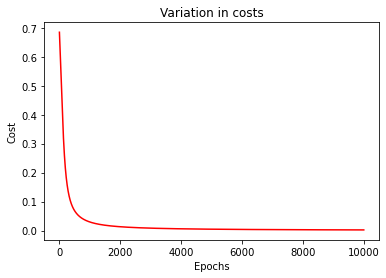

In [10]:
parameters_blobs = nn_train(X_train_blobs, Y_train_blobs, X_test_blobs, Y_test_blobs,
                      input_size = X_train_blobs.shape[1], h = 3, output_size = 1, epochs = 10000, alpha = 0.1)

### Performance on Circles Dataset



epoch: 0 train_accuracy: 0.48120300751879697 test_accuracy: 0.525
epoch: 1000 train_accuracy: 0.40601503759398494 test_accuracy: 0.375
epoch: 2000 train_accuracy: 0.36466165413533835 test_accuracy: 0.33
epoch: 3000 train_accuracy: 0.6278195488721805 test_accuracy: 0.555
epoch: 4000 train_accuracy: 0.8984962406015038 test_accuracy: 0.84
epoch: 5000 train_accuracy: 0.9172932330827067 test_accuracy: 0.87
epoch: 6000 train_accuracy: 0.9924812030075187 test_accuracy: 0.99
epoch: 7000 train_accuracy: 0.9924812030075187 test_accuracy: 1.0
epoch: 8000 train_accuracy: 0.9962406015037594 test_accuracy: 1.0
epoch: 9000 train_accuracy: 0.9962406015037594 test_accuracy: 1.0
epoch: 10000 train_accuracy: 0.9962406015037594 test_accuracy: 1.0


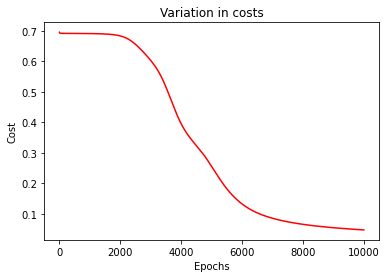

In [11]:
parameters_circles = nn_train(X_train_circles, Y_train_circles, X_test_circles, Y_test_circles,
                      input_size = X_train_circles.shape[1], h = 3, output_size = 1, epochs = 10000, alpha = 0.1)

### Task 4: Challenging Task (Training and Testing on CIFAR-10 Dataset)

We have been given the two distinct classes to classify: horse, dog. We have taken the batch1 for training our neural network. We extract out particular classes to distinguish  along with the observation featuers in order to create the trainig data. Further we have normalized the training and test data by diving it by 255; since the image pixels ranges in between from 0–255 and we want values ranging between 0 and 1. We have increased the number of neurons in hidden layer to 21.

Loading the CIFAR-10 dataset

The code used is the same as the code provided in the LoadCIFAR10.ipynb file

In [12]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [13]:
# Load the batch
batch1 = loadbatch('data_batch_1')
print("Batch length", len(batch1))

# Looking at all the keys, so that we can choose the required ones
print('All keys in the batch:', batch1.keys())

# Extract Labels
labels = batch1[b'labels']
print(loadlabelnames())

Batch length 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


In [14]:
batch1 = loadbatch('data_batch_1')
batch1_data= batch1[b'data']    
batch1_labels = batch1[ b'labels']

# fetching the first 1024 features - which is the red channel in the RGB scale
batch1_red_channel = batch1_data[:,:1024]

# fetching the labels from the dictionary
batch1_labels = np.array([batch1_labels])
batch1_labels = batch1_labels.T

batch1_data = np.append(batch1_red_channel,batch1_labels,axis=1)
# fetching the horse class from the dataset
horse_data = batch1_data[batch1_data[:,-1] == 5]

# fetching the dog class from the dataset
dog_data = batch1_data[batch1_data[:,-1] == 7]

# merging both the classes - dog and horse
y = np.concatenate((horse_data,dog_data),axis=0)

# converting the labels to 0 and 1
Y = y[:,[-1]]
Y[Y==5] = 0
Y[Y==7] = 1

X = np.delete(y,-1,1)
Y.shape

(1938, 1)

In [15]:
# dividing the cifar dataset into training and test set
X_train_cifar, X_test_cifar, Y_train_cifar, Y_test_cifar = train_test_split(X, Y, 
                                               test_size=0.3, random_state=17)

# Normalising the data to reduce the pixel value
X_train_cifar = X_train_cifar/255
X_test_cifar = X_test_cifar/255

print(X_train_cifar.shape)
print(Y_train_cifar.shape)
print(X_test_cifar.shape)
print(Y_test_cifar.shape)

(1356, 1024)
(1356, 1)
(582, 1024)
(582, 1)


epoch: 0 train_accuracy: 0.5228613569321534 test_accuracy: 0.5017182130584192
epoch: 50 train_accuracy: 0.6246312684365781 test_accuracy: 0.6048109965635738
epoch: 100 train_accuracy: 0.6408554572271387 test_accuracy: 0.634020618556701
epoch: 150 train_accuracy: 0.6489675516224189 test_accuracy: 0.6512027491408935
epoch: 200 train_accuracy: 0.6504424778761062 test_accuracy: 0.6701030927835051
epoch: 250 train_accuracy: 0.6600294985250738 test_accuracy: 0.6683848797250859
epoch: 300 train_accuracy: 0.6629793510324484 test_accuracy: 0.6649484536082474
epoch: 350 train_accuracy: 0.6755162241887905 test_accuracy: 0.6683848797250859
epoch: 400 train_accuracy: 0.6828908554572272 test_accuracy: 0.6735395189003437
epoch: 450 train_accuracy: 0.6917404129793511 test_accuracy: 0.6769759450171822
epoch: 500 train_accuracy: 0.6976401179941003 test_accuracy: 0.6855670103092784


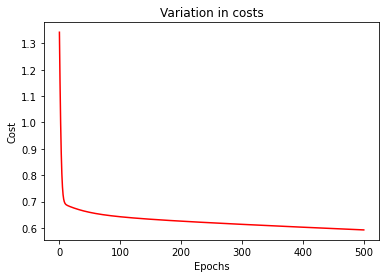

In [16]:
parameters_cifar = nn_train(X_train_cifar, Y_train_cifar, X_test_cifar, Y_test_cifar,
                      input_size = X_train_cifar.shape[1], h = 21, output_size = 1, epochs = 500, alpha = 0.1)

### Task 5: Deep Learning Enhancements 

#### Enhancement by Apporva Patil (Student ID: 21237465)

In order to improve the performance of the model, I have implemented Stochastic Gradient Descent.

#### Stochastic Gradient Descent:

Stochastic Gradeint Descent is an optimization algorithm which is used along with back-propagation, where we calculate the gradients for each observation while model development. In gradient descent if we are having a large dataset, there are a lot of redundant calculations before every update of parameters for observations which are alike. Stochastic Gradient Descent does one update at a time and it faciliates more fluctuations to find better local minima. Also, in order to avoid overshooting, we generally reduce the learning rate.

In [17]:
def nn_train_sgd(X_train, Y_train, X_test, Y_test, input_size, h, output_size, epochs, alpha):
    """Author: Apoorva Patil"""
    
    params = initialize_params(input_size, h, output_size)
    
    # initializing an empty list to store the cost values
    costs_list = []
    
    for i in range(epochs+1):
        for j in range(X_train.shape[0]):
            case = np.random.choice(X_train.shape[0],size=1,replace=False)
            X_train_new = X_train[case,:]
            Y_train_new = Y_train[case,:]
             
            forward_feed = forward_propagation(X_train_new, params)

            params = backward_propagation(X_train_new, Y_train_new, params, forward_feed, alpha)

        train_pred = predict(X_train,params)
        test_pred = predict(X_test,params)
        
        cost_val = costFunc(forward_feed["A2"],Y_train)
        costs_list.append(cost_val)
    
        if i%(epochs/10)==0:
            acc_train=accuracy_score(Y_train, train_pred)
            acc_test=accuracy_score(Y_test, test_pred)
            print("epoch:",i,"train_accuracy:",acc_train,"test_accuracy:",acc_test)
        
    # plot the cost list
    mlp.plot(costs_list, color='red')
    mlp.ylabel('Cost')
    mlp.xlabel('Epochs')
    mlp.title("Variation in costs")
    mlp.show()
        
    return params

epoch: 0 train_accuracy: 0.4778761061946903 test_accuracy: 0.5034364261168385
epoch: 50 train_accuracy: 0.6747787610619469 test_accuracy: 0.6357388316151202
epoch: 100 train_accuracy: 0.5796460176991151 test_accuracy: 0.5412371134020618
epoch: 150 train_accuracy: 0.7676991150442478 test_accuracy: 0.7130584192439863
epoch: 200 train_accuracy: 0.745575221238938 test_accuracy: 0.7079037800687286
epoch: 250 train_accuracy: 0.5457227138643068 test_accuracy: 0.5292096219931272
epoch: 300 train_accuracy: 0.7595870206489675 test_accuracy: 0.7010309278350515
epoch: 350 train_accuracy: 0.7256637168141593 test_accuracy: 0.7027491408934707
epoch: 400 train_accuracy: 0.7234513274336283 test_accuracy: 0.7044673539518901
epoch: 450 train_accuracy: 0.7654867256637168 test_accuracy: 0.718213058419244
epoch: 500 train_accuracy: 0.745575221238938 test_accuracy: 0.7027491408934707


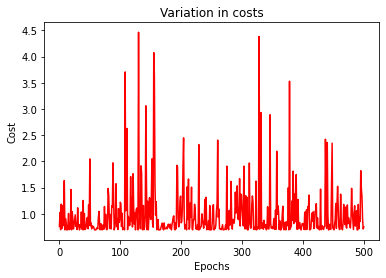

In [18]:
parameters_cifar = nn_train_sgd(X_train_cifar, Y_train_cifar, X_test_cifar, Y_test_cifar,
                      input_size = X_train_cifar.shape[1], h = 21, output_size = 1, epochs = 500, alpha = 0.1)

Upon implementation of Stochastic Gradient Descent in our neural network model, we observe a performance increase of around 2%

#### Enhancement by Swapnil Siddarth (Student ID: 21230014)

In order to improve the performance of the model, I have implemented L2 Regularization. 

#### L2 Regularization:

While model building in neural networks, training with larger epochs the weights become specialized(larger) which tends to reduce the performance of model. Models which are complex, and there is overfitting due to model development picking up noise in the data, we can use regularization to reduce the complexity and avoid overfitting. Using L2 regularization, the weights parameters reduce gradually towards 0, but exactly 0. We keep a regularization parameter called lambda which is a hyperparameter used for optimzation. 


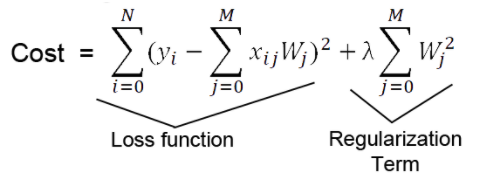

<center>
Source: O'Reilly 
</center>

In [19]:
#cost function implementation
def costFunc_reg(Yhat, Y, params, l2_lambda = 0.01):
    """Author: Swapnil Siddharth"""
    N = Y.shape[0]
    W = params["Wih"]
    log_loss = (1/N) * np.sum(Y*np.log(Yhat) + (1-Y)*np.log(1-Yhat))
    l2_reg_cost = (l2_lambda/(2.*N)) * np.sum([np.sum(np.square(W))])
    
    return log_loss +  l2_reg_cost

In [20]:
def backward_propagation_with_regularization(X_train,Y_train, params, forward_feed, alpha, lam = 0.01):
    """Author: Swapnil Siddharth"""
    # fetching the activation values from the dictionary
    A2 = forward_feed["A2"]
    A1 = forward_feed["A1"]

    # fetching the weights and biases from the dictionary
    Wih = params['Wih']
    Bih = params['Bih']
    Who = params['Who']
    Bho = params['Bho']

    N = X_train.shape[0] #no of training cases

    # calculating the derivatives
    dZ2 = A2 - Y_train # calculating the loss
    dW2 = (1./N)*np.dot(A1.T, dZ2) + (lam*Who)/N # derivative of loss w.r.t y-hat adding the regularization
    db2 = (1./N)*np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = np.dot(dZ2, Who.T)
    dZ1 = dZ1 * (A1 * (1-A1)) # derivative of hidden layer output to weights
    dW1 = (1./N)*np.dot(X_train.T, dZ1) + (lam*Wih)/N # X-train can be represented as a[0]
    db1 = (1./N)*np.sum(dZ1, axis=0, keepdims=True)

    # weight updates
    Wih = Wih - alpha * dW1
    Bih = Bih - alpha * db1
    Who = Who - alpha * dW2
    Bho = Bho - alpha * db2

    # updating the new weight values in the dictionary
    params = {"Wih":Wih,"Bih":Bih,"Who":Who,"Bho":Bho}

    return params

In [21]:
def nn_train_l2reg(X_train, Y_train, X_test, Y_test, input_size, h, output_size, epochs, alpha, lam=0.01):
    """Author: Swapnil Siddharth"""
    # initializing the weights and biases to random values
    params = initialize_params(input_size, h, output_size)
    
    # initializing an empty list to store the cost values
    costs_list = []
    
    for i in range(epochs+1):

        forward_feed = forward_propagation(X_train, params)
        params = backward_propagation_with_regularization(X_train, Y_train, params, forward_feed, alpha, lam=0.01)
        
        cost_val = costFunc_reg(forward_feed["A2"],Y_train,params,lam)
        costs_list.append(cost_val)

        # calling the predict function on the training dataset
        train_pred = predict(X_train,params)

        #calling the predict function on the testing dataset after model training
        test_pred = predict(X_test,params)

        # calculating the accuracy using sklearn's accuracy_score function
        if i%(epochs/10)==0:
            acc_train=accuracy_score(Y_train, train_pred)
            acc_test=accuracy_score(Y_test, test_pred)
            print("epoch:",i,"train_accuracy:",acc_train,"test_accuracy:",acc_test)
    
    # plot the cost list
    mlp.plot(costs_list, color='red')
    mlp.ylabel('Cost')
    mlp.xlabel('Epochs')
    mlp.title("Variation in costs")
    mlp.show()
    
    return params


Upon adding the reglarization term lamba, lam = 0.01, we observe that we get a performance increase of 1%

epoch: 0 train_accuracy: 0.5228613569321534 test_accuracy: 0.5017182130584192
epoch: 100 train_accuracy: 0.6408554572271387 test_accuracy: 0.634020618556701
epoch: 200 train_accuracy: 0.6504424778761062 test_accuracy: 0.6701030927835051
epoch: 300 train_accuracy: 0.6629793510324484 test_accuracy: 0.6649484536082474
epoch: 400 train_accuracy: 0.6828908554572272 test_accuracy: 0.6735395189003437
epoch: 500 train_accuracy: 0.6976401179941003 test_accuracy: 0.6855670103092784
epoch: 600 train_accuracy: 0.7042772861356932 test_accuracy: 0.6890034364261168
epoch: 700 train_accuracy: 0.7123893805309734 test_accuracy: 0.6924398625429553
epoch: 800 train_accuracy: 0.7205014749262537 test_accuracy: 0.6941580756013745
epoch: 900 train_accuracy: 0.7278761061946902 test_accuracy: 0.697594501718213
epoch: 1000 train_accuracy: 0.7300884955752213 test_accuracy: 0.6993127147766323


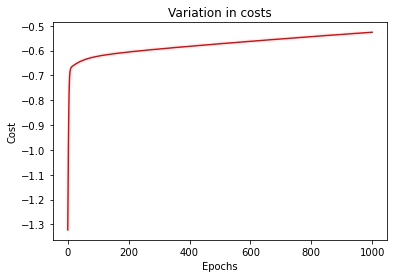

In [22]:
parameters_cifar = nn_train_l2reg(X_train_cifar, Y_train_cifar, X_test_cifar, Y_test_cifar,
                      input_size = X_train_cifar.shape[1], h = 21, output_size = 1, epochs = 1000, alpha = 0.1, lam = 0.01)

### References:

* Week 3 Lecture Notes: Topic 03: Fundamentals of Neural Networks, Part 2

* Week 4 Lecture Notes: Topic 04: Deep Neural Networks, Part 1

* [Neural Networks, Structure, Weights and Matrices](https://python-course.eu/machine-learning/neural-networks-structure-weights-and-matrices.php)

* [How Does the Gradient Descent Algorithm Work in Machine Learning?](https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/)

* [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function)

* [L2 and L1 Regularization in Machine Learning](https://www.analyticssteps.com/blogs/l2-and-l1-regularization-machine-learning)

* [The Ascent of Gradient Descent](https://blog.clairvoyantsoft.com/the-ascent-of-gradient-descent-23356390836f)